In [1]:
from recordclass import dataobject, enable_gc, clsconfig
import matplotlib.pyplot as plt
import numpy as np
import time
import gc

In [2]:
class Point(dataobject):
    x:int
    y:int
    __options__ = {'argsonly':True}

@enable_gc
class Point_GC(dataobject):
    x:int
    y:int
    __options__ = {'argsonly':True}
        
class Point_Slots:
    __slots__ = 'x','y','c','d','e','f'
    x:int
    y:int
        
    def __init__(self, x, y):
        self.x = x; self.y = y

In [3]:
def test(N):
#     ll = N*[None]
    for i in range(N):
        c = Point(1,2)
#         ll[i] = c
        
def test_gc(N):
#     ll = N*[None]
    for i in range(N):
        c = Point_GC(1,2)
#         ll[i] = c
        
def test_slots(N):
#     ll = N*[None]
    for i in range(N):
        c = Point_Slots(1,2)
#         ll[i] = c

In [4]:
gc.collect()
m = 22
Ns = [int(2**x) for x in range(1,m+1)]
Ts = np.zeros(m)
Ts_gc = np.zeros(m)
Ts_slots = np.zeros(m)
for i in range(m):
    N = Ns[i]

    gc.collect()
    gc.collect()

    t0 = time.time()
    test(N)
    Ts[i] = time.time()-t0
    
    gc.collect()
    gc.collect()
    
    t1 = time.time()
    test_gc(N)
    Ts_gc[i] = time.time()-t1

#     gc.collect()
#     gc.collect()

#     t1 = time.time()
#     test_slots(N)
#     Ts_slots[i] = time.time()-t1
    

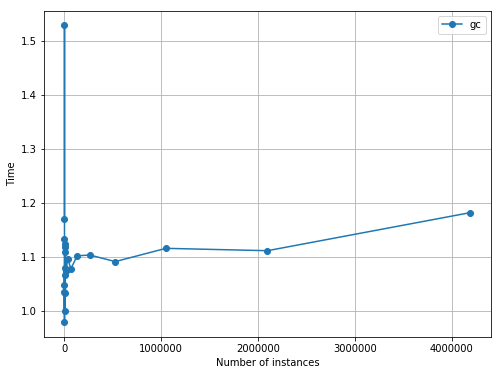

In [5]:
plt.figure(figsize=(8, 6))
# plt.plot(Ns, Ts, marker='o', label='nogc')
plt.plot(Ns, Ts_gc/Ts, marker='o', label='gc')
# plt.loglog(Ns, Ts_slots, marker='s', label='slots')
plt.legend()
plt.xlabel("Number of instances")
plt.ylabel('Time')
plt.grid(1)
plt.show()

In [6]:
import pickle

In [7]:
p1 = Point(1,2)
p2 = Point_Slots(1, 2)

In [9]:
b1 = pickle.dumps(p1)
b2 = pickle.dumps(p2)

In [10]:
print(len(b1), len(b2))

31 61


In [13]:
print(b1)
print(b2)

b'\x80\x03c__main__\nPoint\nq\x00K\x01K\x02\x86q\x01Rq\x02.'
b'\x80\x03c__main__\nPoint_Slots\nq\x00)\x81q\x01N}q\x02(X\x01\x00\x00\x00xq\x03K\x01X\x01\x00\x00\x00yq\x04K\x02u\x86q\x05b.'


In [12]:
print(pickle.loads(b1))

Point(x=1, y=2)


In [16]:
%timeit pickle.loads(pickle.dumps([Point(1,2) for i in range(1000)]))

1000 loops, best of 5: 622 µs per loop


In [17]:
%timeit pickle.loads(pickle.dumps([Point_Slots(1,2) for i in range(1000)]))

100 loops, best of 5: 1.45 ms per loop
